In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker




In [2]:
df = pd.read_parquet("D:/projeto_lapes/datalake/silver/silver_pacientes.parquet")
df.head()

,Image Index,Finding Labels,Follow-up #,Patient Age,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],genero
0,00000001_000.png,Cardiomegaly,0,58,PA,2682,2749,0.143,0.143,Male
1,00000001_001.png,Cardiomegaly|Emphysema,1,58,PA,2894,2729,0.143,0.143,Male
2,00000001_002.png,Cardiomegaly|Effusion,2,58,PA,2500,2048,0.168,0.168,Male
3,00000002_000.png,No Finding,0,81,PA,2500,2048,0.171,0.171,Male
4,00000003_000.png,Hernia,0,81,PA,2582,2991,0.143,0.143,Female


In [3]:
print(df.isnull().sum())

Image Index                    0
Finding Labels                 0
Follow-up #                    0
Patient Age                    0
View Position                  0
OriginalImage[Width            0
Height]                        0
OriginalImagePixelSpacing[x    0
y]                             0
genero                         0
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112104 entries, 0 to 112103
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112104 non-null  object 
 1   Finding Labels               112104 non-null  object 
 2   Follow-up #                  112104 non-null  int64  
 3   Patient Age                  112104 non-null  int64  
 4   View Position                112104 non-null  object 
 5   OriginalImage[Width          112104 non-null  int64  
 6   Height]                      112104 non-null  int64  
 7   OriginalImagePixelSpacing[x  112104 non-null  float64
 8   y]                           112104 non-null  float64
 9   genero                       112104 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.6+ MB


In [5]:
df.describe()

,Follow-up #,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y]
count,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000,112104.000000
mean,8.574172,46.872574,2646.035253,2486.393153,0.155651,0.155651
std,15.406734,16.598152,341.243771,401.270806,0.016174,0.016174
min,0.000000,1.000000,1143.000000,966.000000,0.115000,0.115000
25%,0.000000,35.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000
75%,10.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000
max,183.000000,95.000000,3827.000000,4715.000000,0.198800,0.198800


In [6]:

df = df[df["Patient Age"] < 100]

# Verificando o resultado
print(df["Patient Age"].describe())

count    112104.000000
mean         46.872574
std          16.598152
min           1.000000
25%          35.000000
50%          49.000000
75%          59.000000
max          95.000000
Name: Patient Age, dtype: float64


In [7]:

df = df.loc[:, ~df.columns.str.contains("^Unnamed")]


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112104 entries, 0 to 112103
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Image Index                  112104 non-null  object 
 1   Finding Labels               112104 non-null  object 
 2   Follow-up #                  112104 non-null  int64  
 3   Patient Age                  112104 non-null  int64  
 4   View Position                112104 non-null  object 
 5   OriginalImage[Width          112104 non-null  int64  
 6   Height]                      112104 non-null  int64  
 7   OriginalImagePixelSpacing[x  112104 non-null  float64
 8   y]                           112104 non-null  float64
 9   genero                       112104 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 8.6+ MB


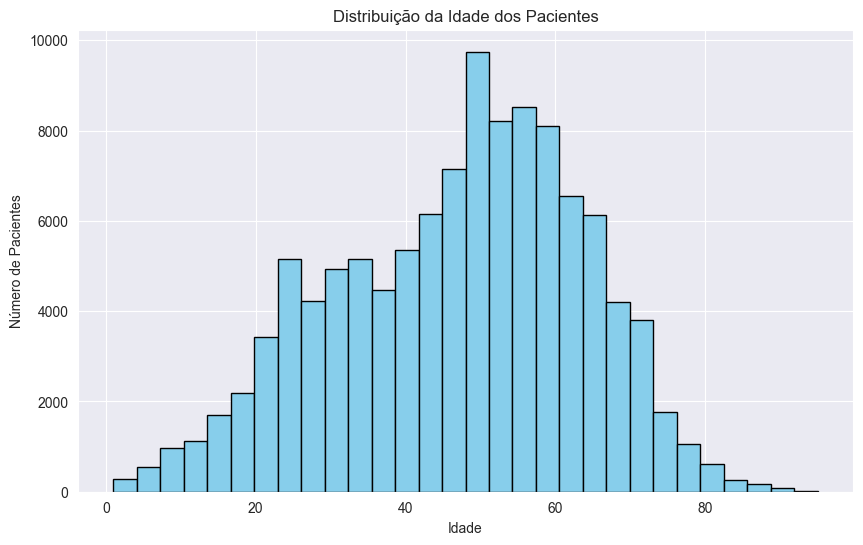

In [8]:

#distribuicao de idade
plt.figure(figsize=(10, 6))
plt.hist(df["Patient Age"], bins=30, color="skyblue", edgecolor="black")
plt.title("Distribuição da Idade dos Pacientes")
plt.xlabel("Idade")
plt.ylabel("Número de Pacientes")
plt.grid(True)
plt.show()


In [9]:
pathology_list = ['Cardiomegaly','Emphysema','Effusion','Hernia','Nodule','Pneumothorax','Atelectasis','Pleural_Thickening','Mass','Edema','Consolidation','Infiltration','Fibrosis','Pneumonia']

for pathology in pathology_list :
    df[pathology] = df['Finding Labels'].apply(lambda x: 1 if pathology in x else 0)

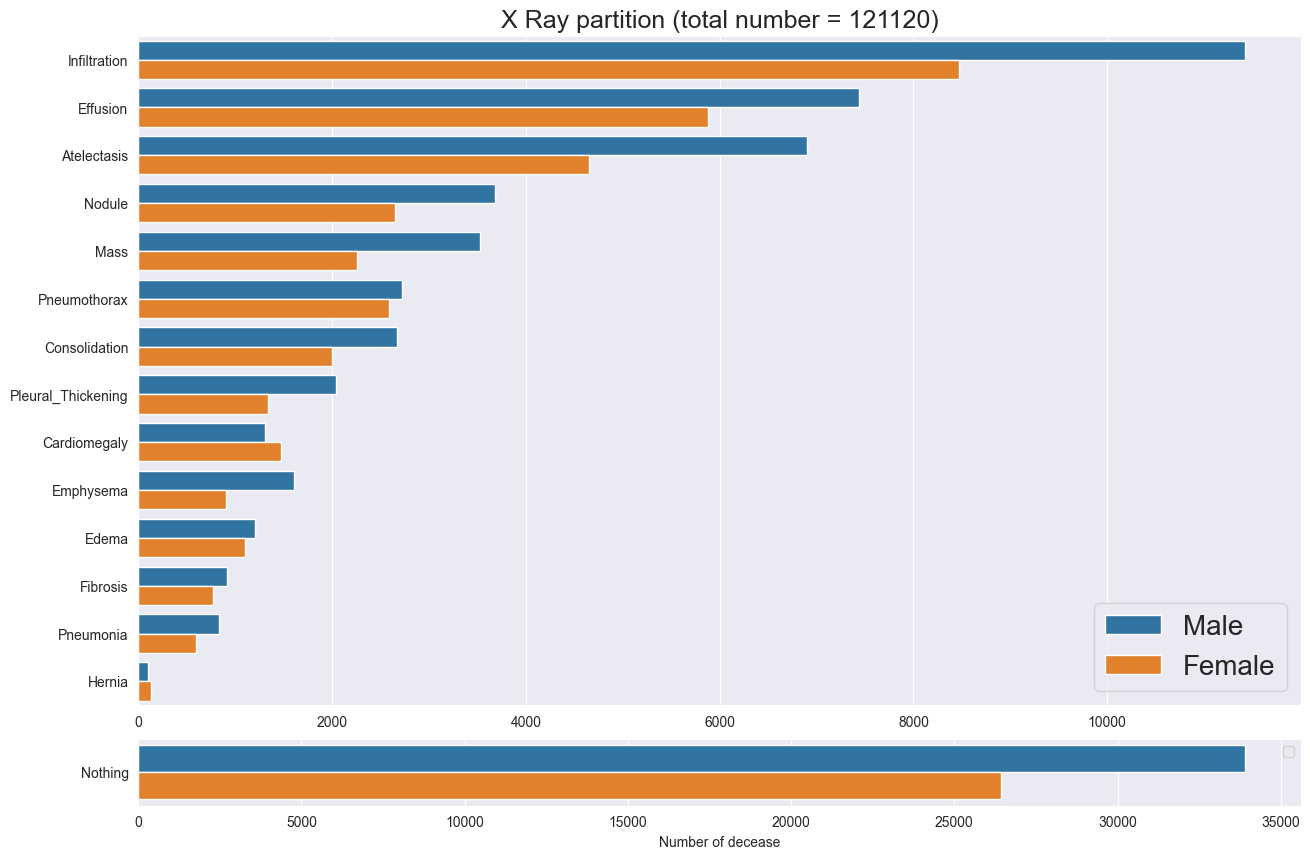

In [10]:
#verificando a incidencia de cada doenca em diferentes sexos
plt.figure(figsize=(15,10))
gs = gridspec.GridSpec(8,1)
ax1 = plt.subplot(gs[:7, :])
ax2 = plt.subplot(gs[7, :])
data1 = pd.melt(df,
             id_vars=['genero'],
             value_vars = list(pathology_list),
             var_name = 'Category',
             value_name = 'Count')
data1 = data1.loc[data1.Count>0]
g=sns.countplot(y='Category',hue='genero',data=data1, ax=ax1, order = data1['Category'].value_counts().index)
ax1.set( ylabel="",xlabel="")
ax1.legend(fontsize=20)
ax1.set_title('X Ray partition (total number = 121120)',fontsize=18);

df['Nothing']=df['Finding Labels'].apply(lambda x: 1 if 'No Finding' in x else 0)

data2 = pd.melt(df,
             id_vars=['genero'],
             value_vars = list(['Nothing']),
             var_name = 'Category',
             value_name = 'Count')
data2 = data2.loc[data2.Count>0]
g=sns.countplot(y='Category',hue='genero',data=data2,ax=ax2)
ax2.set( ylabel="",xlabel="Number of decease")
ax2.legend('')
plt.subplots_adjust(hspace=.5)

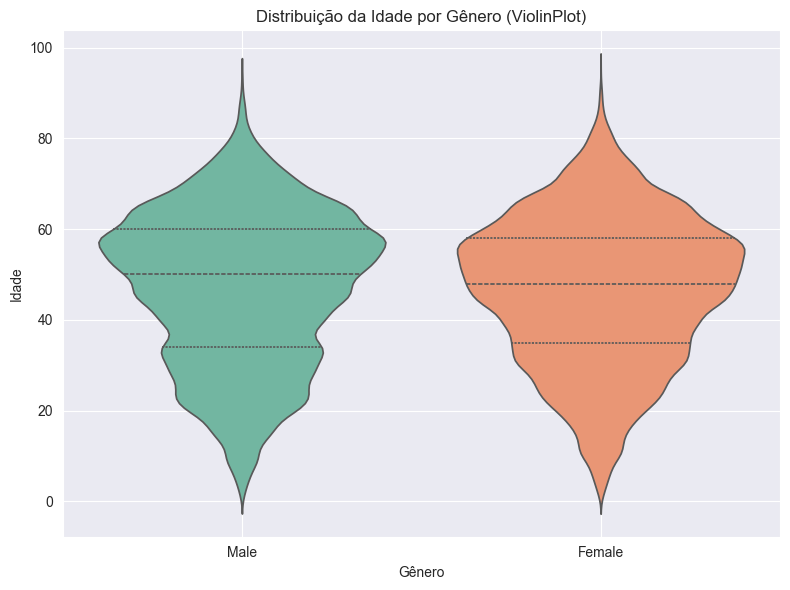

In [11]:

df = df[
    (df['Patient Age'].between(0, 120)) &
    (df['genero'].isin(['Male', 'Female']))
]


plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='genero', y='Patient Age',palette='Set2',hue='genero', inner='quartile')
plt.title("Distribuição da Idade por Gênero (ViolinPlot)")
plt.xlabel("Gênero")
plt.ylabel("Idade")
plt.grid(True)
plt.tight_layout()
plt.show()

<Axes: xlabel='faixa_etaria'>

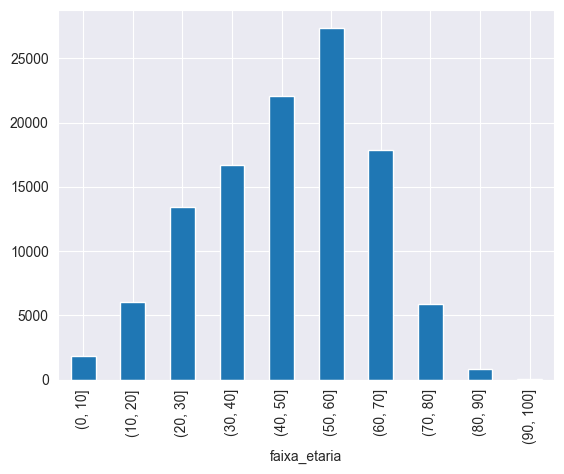

In [12]:

df['faixa_etaria'] = pd.cut(df['Patient Age'], bins=range(0, 110, 10))
df['faixa_etaria'].value_counts().sort_index().plot(kind='bar')

<Axes: >

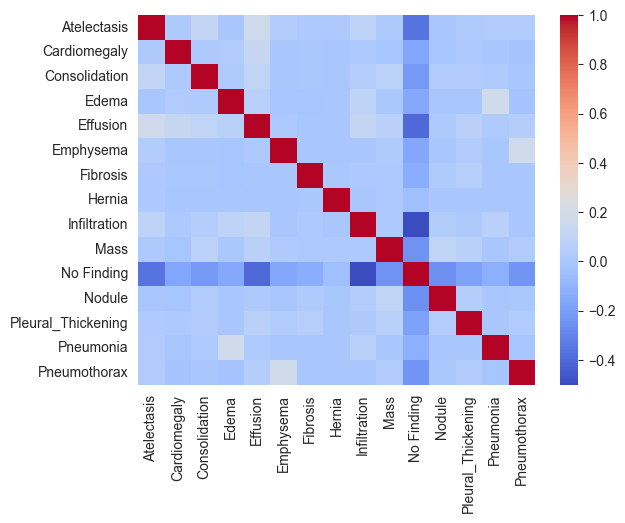

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
labels = df['Finding Labels'].str.split('|')
multi_hot = pd.DataFrame(mlb.fit_transform(labels), columns=mlb.classes_)
sns.heatmap(multi_hot.corr(), cmap="coolwarm")


<Axes: xlabel='View Position'>

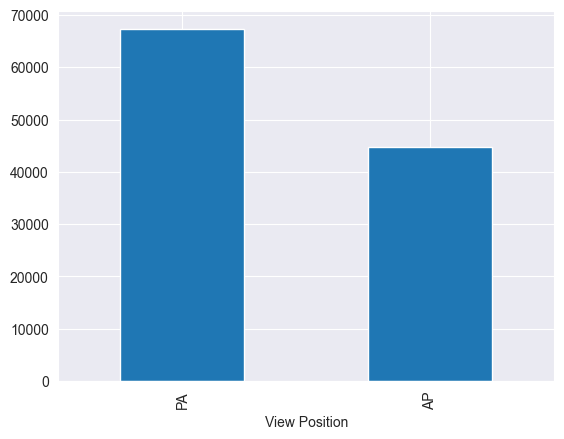

In [14]:
df['View Position'].value_counts().plot(kind='bar')

In [15]:
from collections import Counter
labels = df['Finding Labels'].dropna().str.split('|').sum()
Counter(labels).most_common(10)


[('No Finding', 60353),
 ('Infiltration', 19891),
 ('Effusion', 13316),
 ('Atelectasis', 11558),
 ('Nodule', 6331),
 ('Mass', 5779),
 ('Pneumothorax', 5301),
 ('Consolidation', 4667),
 ('Pleural_Thickening', 3384),
 ('Cardiomegaly', 2776)]

In [16]:
from collections import Counter
labels = df['Finding Labels'].dropna().str.split('|').explode()
top10 = Counter(labels).most_common(10)

# Separar os nomes e as contagens para o gráfico
labels_names = [item[0] for item in top10]
labels_counts = [item[1] for item in top10]



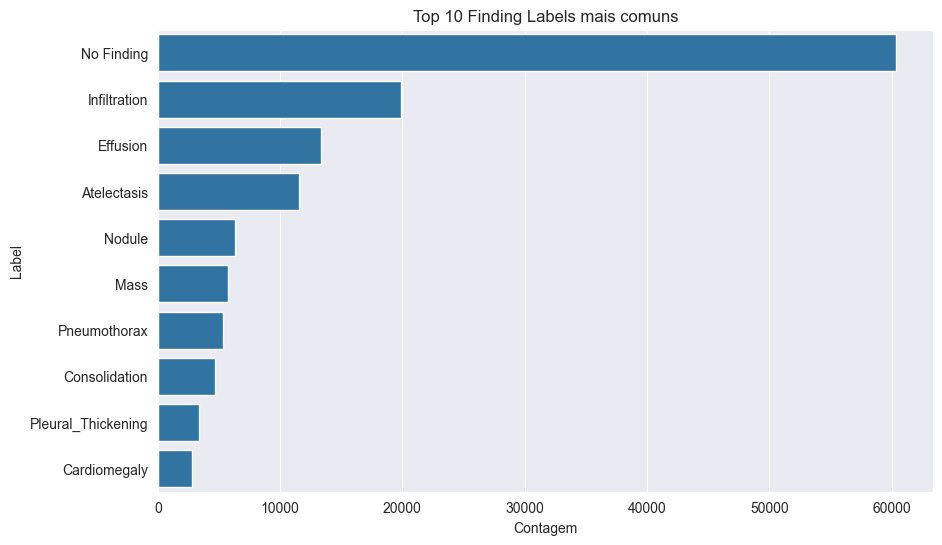

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x=labels_counts, y=labels_names, orient='h')
plt.title('Top 10 Finding Labels mais comuns')
plt.xlabel('Contagem')
plt.ylabel('Label')
plt.show()


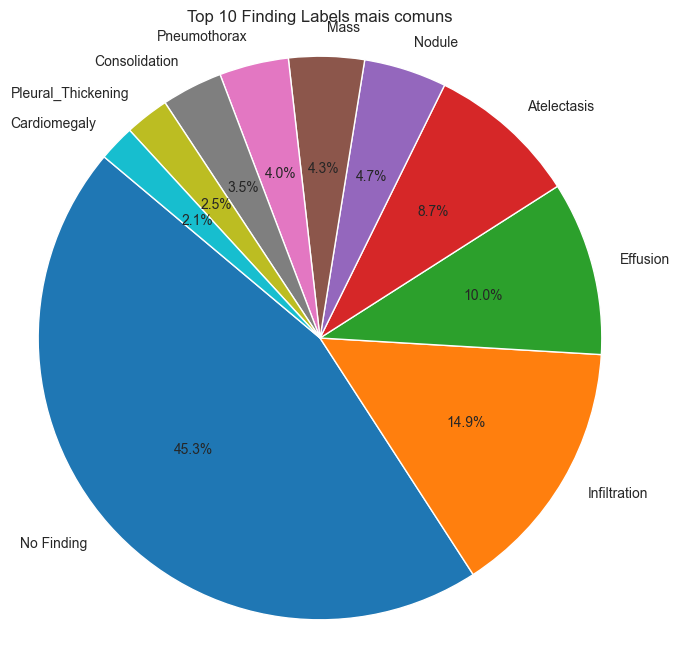

In [18]:
# Plotar gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(labels_counts, labels=labels_names, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Finding Labels mais comuns')
plt.axis('equal')
plt.show()


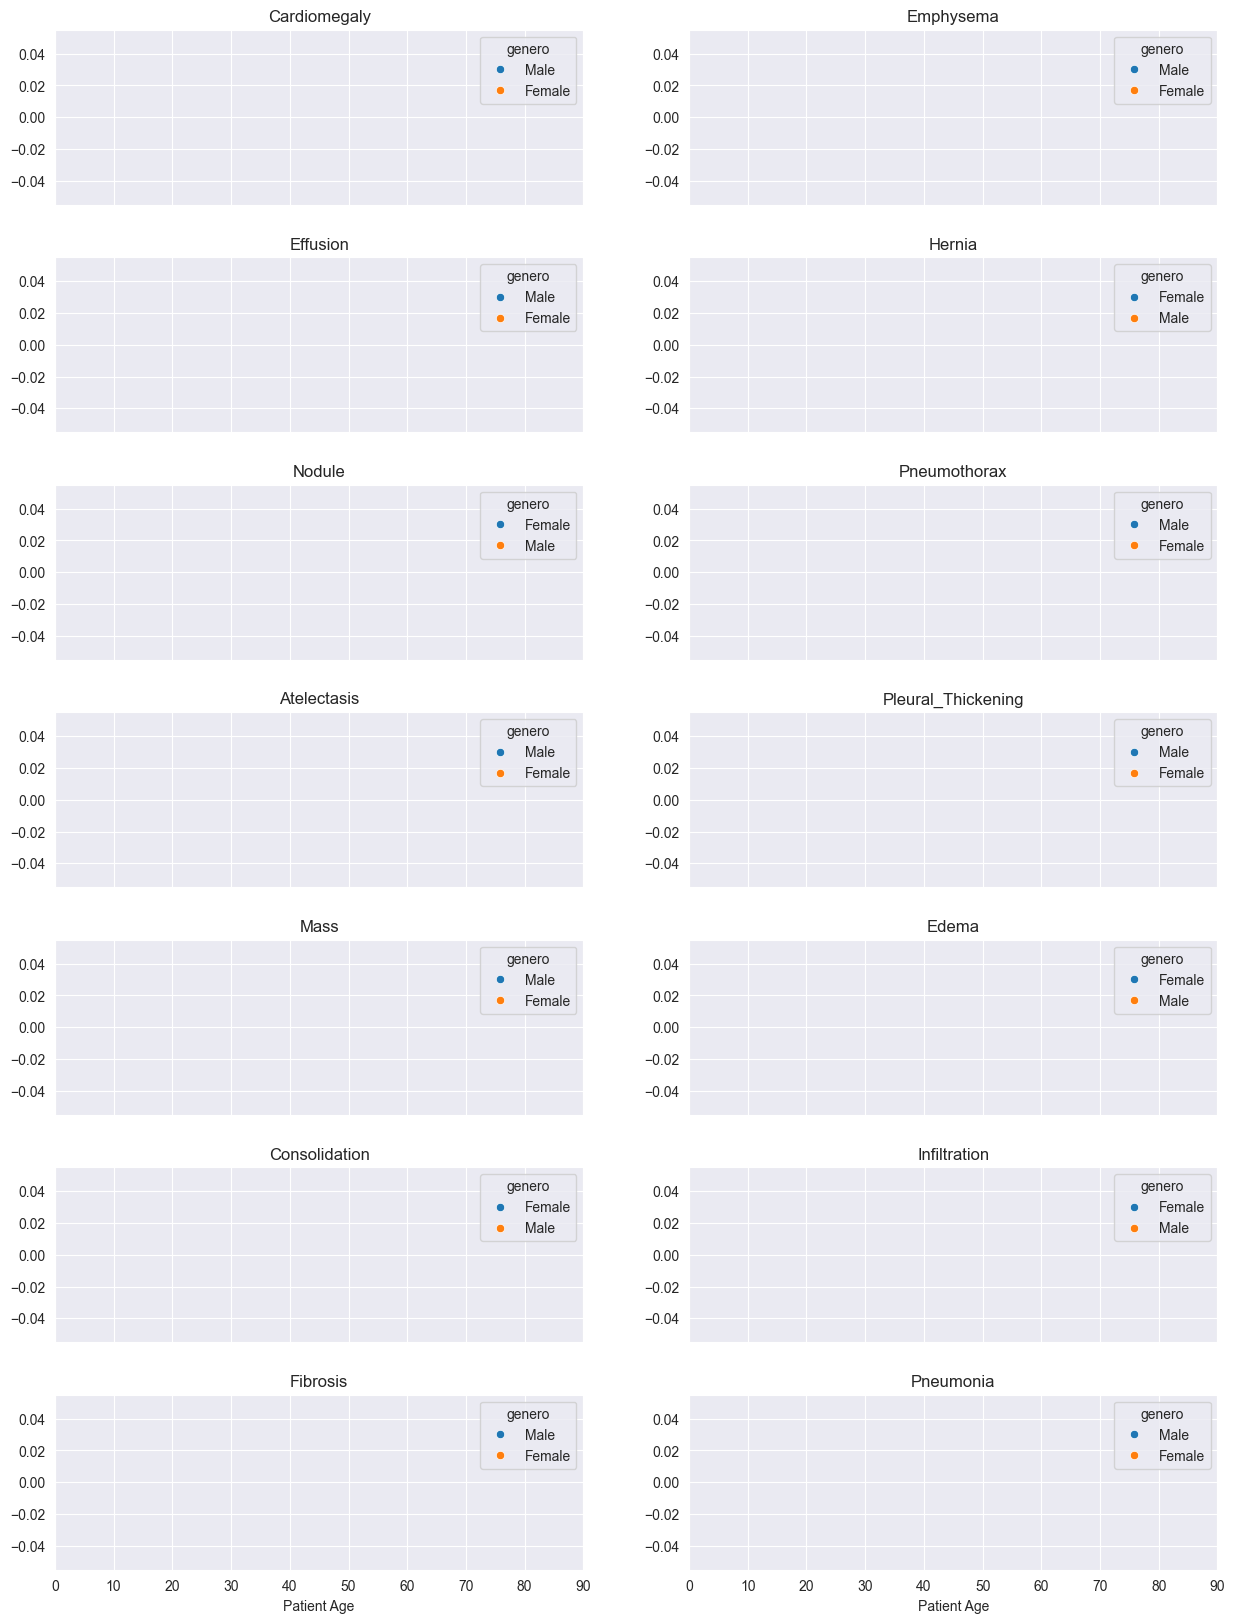

In [19]:
f, axarr = plt.subplots(7, 2, sharex=True,figsize=(15, 20))

i=0
j=0
x=np.arange(0,100,10)
for pathology in pathology_list :
    g=sns.scatterplot(x='Patient Age', hue="genero",data=df[df['Finding Labels']==pathology], ax=axarr[i, j])
    axarr[i, j].set_title(pathology)
    g.set_xlim(0,90)
    g.set_xticks(x)
    g.set_xticklabels(x)
    j=(j+1)%2
    if j==0:
        i=(i+1)%7
f.subplots_adjust(hspace=0.3)


C:\Users\Cadu\AppData\Local\Temp\ipykernel_18064\2862232007.py:13: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = filtered_df.pivot_table(


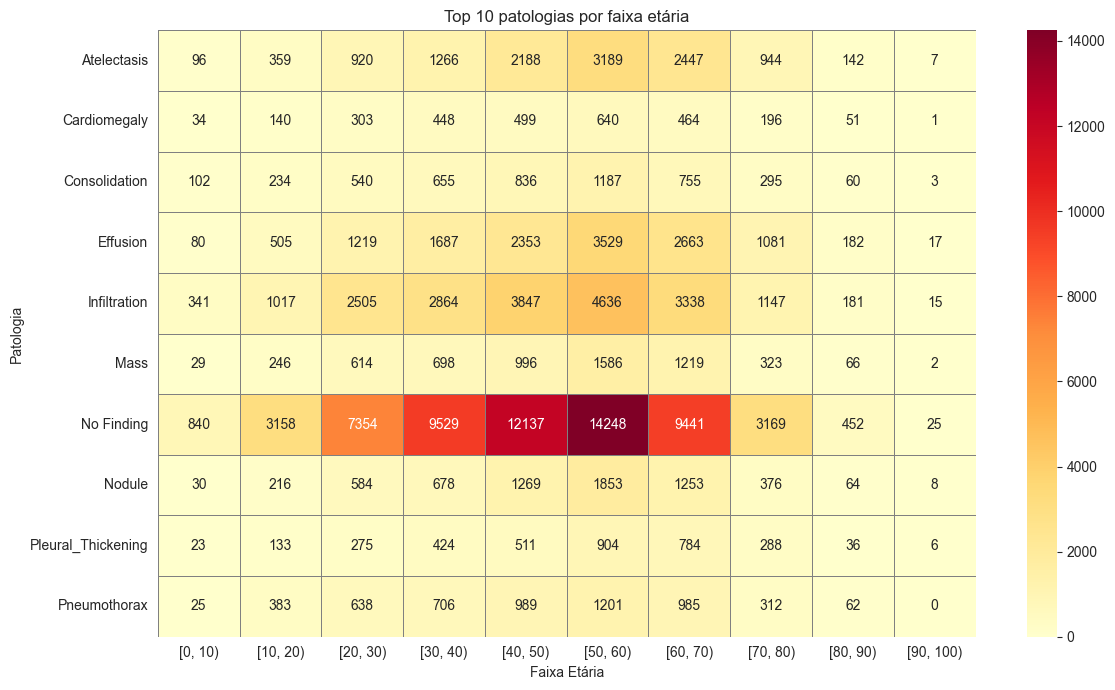

In [20]:
# Expandir múltiplos diagnósticos em linhas separadas
df["Finding Labels"] = df["Finding Labels"].str.split("|")
df_expanded = df.explode("Finding Labels")

# Criar faixa etária (grupos de 10 anos)
df_expanded["Age Group"] = pd.cut(df_expanded["Patient Age"], bins=np.arange(0, 110, 10), right=False)

# Selecionar as 10 patologias mais frequentes
top10 = df_expanded["Finding Labels"].value_counts().nlargest(10).index
filtered_df = df_expanded[df_expanded["Finding Labels"].isin(top10)]

# Tabela cruzada: patologias x faixas etárias
heatmap_data = filtered_df.pivot_table(
    index="Finding Labels",
    columns="Age Group",
    values="Image Index",
    aggfunc="count",
    fill_value=0
)

# Plotar o heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlOrRd", linewidths=0.5, linecolor="gray")
plt.title("Top 10 patologias por faixa etária")
plt.xlabel("Faixa Etária")
plt.ylabel("Patologia")
plt.tight_layout()
plt.show()

In [21]:
df.head()

,Image Index,Finding Labels,Follow-up #,Patient Age,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],genero,...,Atelectasis,Pleural_Thickening,Mass,Edema,Consolidation,Infiltration,Fibrosis,Pneumonia,Nothing,faixa_etaria
0,00000001_000.png,[Cardiomegaly],0,58,PA,2682,2749,0.143,0.143,Male,...,0,0,0,0,0,0,0,0,0,"(50, 60]"
1,00000001_001.png,"[Cardiomegaly, Emphysema]",1,58,PA,2894,2729,0.143,0.143,Male,...,0,0,0,0,0,0,0,0,0,"(50, 60]"
2,00000001_002.png,"[Cardiomegaly, Effusion]",2,58,PA,2500,2048,0.168,0.168,Male,...,0,0,0,0,0,0,0,0,0,"(50, 60]"
3,00000002_000.png,[No Finding],0,81,PA,2500,2048,0.171,0.171,Male,...,0,0,0,0,0,0,0,0,1,"(80, 90]"
4,00000003_000.png,[Hernia],0,81,PA,2582,2991,0.143,0.143,Female,...,0,0,0,0,0,0,0,0,0,"(80, 90]"
